In [1]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/12.8 MB 3.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/12.8 MB 3.4 MB/s eta 0:00:04
   -------- ------------------------------- 2.6/12.8 MB 3.5 MB/s eta 0:00:03
   ----------- ---------------------------- 3.7/12.8 MB 3.9 MB/s eta 0:00:03
   ------------- -------------------------- 4.5/12.8 MB 3.9 MB/s eta 0:00:03
   ------------------ --------------------- 5.8/12.8 MB 4.3 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.8 MB 4.4 MB/s eta 0:00:02
   ------------------------ --------------- 7.9/12.8 MB 4.4 MB/s eta 0:00:02
   --------------------------- ------------ 8.7/12.8 MB 4.4 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.8 MB 4.3 MB/s eta 0:00:01
   -------------------------------- ------- 10.5/12.8 MB 4.3 MB/s eta 0:00:01
   --

In [1]:
import os

os.getcwd() # current directory

'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification'

In [2]:
from skimage.io import imread # read image
from skimage.transform import resize # resize image to train 
import numpy as np # change array
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
input_dir = os.getcwd() + "\\data"
input_dir

'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data'

In [4]:
os.listdir(input_dir)

['cat', 'dog']

In [5]:
os.path.join(input_dir,"cat")

'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data\\cat'

In [6]:
target = []
features = []
for target_variable in os.listdir(input_dir):
    for feature in os.listdir(os.path.join(input_dir,target_variable)):
        features.append(os.path.join(input_dir,target_variable,feature))
        target.append(target_variable)

In [7]:
features

['d:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data\\cat\\download (1).jpg',
 'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data\\cat\\download (2).jpg',
 'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data\\cat\\download (3).jpg',
 'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data\\cat\\download.jpg',
 'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data\\cat\\FELV-cat.jpg',
 'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data\\cat\\images (1).jpg',
 'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data\\cat\\images (2).jpg',
 'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data\\cat\\images.jpg',
 'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data\\dog\\88ff5600-d979-11ef-a5c8-1da73bd59591.jpg',
 'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassifica

In [8]:
target

['cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog']

In [9]:
final_image_result = []

for read_image in features:
    read_image = imread(read_image)
    resize_image = resize(read_image,(32,32))
    final_image_result.append(resize_image.flatten())

final_image_result

[array([1., 1., 1., ..., 1., 1., 1.]),
 array([0.81650291, 0.85963996, 0.8439543 , ..., 0.44094253, 0.3798091 ,
        0.33965486]),
 array([0.89956322, 0.88116773, 0.87825001, ..., 0.24352327, 0.15983213,
        0.1762287 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.14065152, 0.27561082, 0.15107855, ..., 0.26692312, 0.53169188,
        0.17531616]),
 array([0.51669879, 0.57454107, 0.24831679, ..., 0.38086209, 0.5238854 ,
        0.18059762]),
 array([0.96862781, 0.98039216, 1.        , ..., 0.83359926, 0.83359926,
        0.7958303 ]),
 array([0.40811162, 0.36098862, 0.28866146, ..., 0.11534913, 0.23374708,
        0.3400353 ]),
 array([0.2489911 , 0.24772891, 0.16261169, ..., 0.43618233, 0.43747028,
        0.31540644]),
 array([0.81132255, 0.78779314, 0.80347941, ..., 0.55754164, 0.44192725,
        0.4184283 ]),
 array([0.05461997, 0.13218735, 0.12863582, ..., 0.72007414, 0.52903825,
        0.34579508]),
 array([0.76060293, 0.76846982, 0.81550949, ..., 0.17071817, 0.1897

In [10]:
x_train, x_test, y_train, y_test = train_test_split(final_image_result, target, test_size=0.2, shuffle=True, stratify=target)

classifier = SVC()

parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]

grid_search = GridSearchCV(classifier, parameters)

grid_search.fit(x_train, y_train)

best_estimator = grid_search.best_estimator_

y_prediction = best_estimator.predict(x_test)

score = accuracy_score(y_prediction, y_test)


In [11]:
y_prediction

array(['dog', 'dog', 'dog', 'cat'], dtype='<U3')

In [12]:
y_test

['cat', 'dog', 'dog', 'cat']

In [13]:
score*100

75.0

In [23]:
test_image_path = imread(os.getcwd()+"\\download (1).jpg")
#print(test_image_path)
test_image_resize = resize(test_image_path,(32,32))
test_predict = best_estimator.predict(test_image_resize.reshape(1,-1))
test_predict

array(['cat'], dtype='<U3')

Text(0.5, 0, "['cat']")

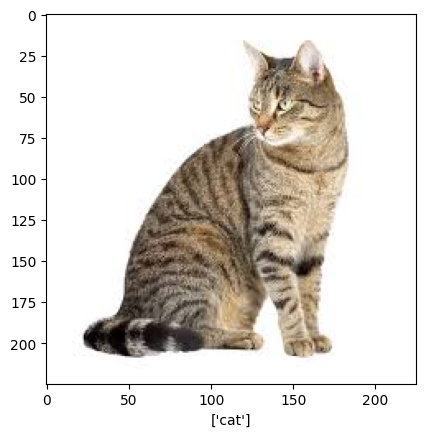

In [25]:
from matplotlib import pyplot as plt 

plt.imshow(test_image_path)
plt.xlabel(test_predict)